## 1. Read in data

In [ ]:
%pip install scikit-learn

In [20]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [21]:
# read in csv file as pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv('/Users/jerramclaughlin/Policy-Language-Analysis/cleaned_data/BP_AR_3514.1_cleaned.csv')

In [3]:
data.head()

,Unnamed: 0,CDS Code,County,District Name,Locale Classifications,District Type,2023-24 Student Enrollment,2023-24 % Unduplicated,BP: 3514.1 Hazardous Substances,BP 3514.1 Year Adopted,...,Staff Capacity Indicators (up to 4),W/O Policy Environmental and Climate Action Score (17 points),"Plans, Communication, and Awards Indicators (up to 3)",District-Wide Campus Sustainability Indicators (up to 3),District-Wide Environmental Community and Culture Indicators (up to 3),Environmental and Climate Action Score (20 points),BP3514.1: Path to PDF,BP3514.1: PDF Text,AR3514.1: Path to PDF,AR3514.1: PDF Text
0,0,1611190000000,Alameda,Alameda Unified,Suburban,Unified School District,10557,41,1,2009,...,1,11.0,2.5,3.0,1.5,14.0,Alameda_Unified_BP3514_1.pdf,policy 35141 hazardous substance status adopte...,Alameda_Unified_AR3514_1.pdf,regulation 35141 hazardous substance status ad...
1,1,1611500000000,Alameda,Castro Valley Unified,Suburban,Unified School District,9489,43,1,2018,...,0,7.5,1.0,3.0,1.5,10.5,Castro_Valley_Unified_BP3514_1.pdf,book board policy section 3000 business nonins...,Castro_Valley_Unified_AR3514_1.pdf,book board policy section 3000 business nonins...
2,2,1611680000000,Alameda,Emery Unified,Suburban,Unified School District,600,81,1,2004,...,0,3.0,0.0,2.5,0.5,6.0,Emery_Unified_BP3514_1.pdf,policy 35141 hazardous substance status adopte...,Emery_Unified_AR3514_1.pdf,regulation 35141 hazardous substance status ad...
3,3,1611920000000,Alameda,Hayward Unified,Suburban,Unified School District,20190,82,1,1991,...,0,5.5,0.5,3.0,0.5,8.5,Hayward_Unified_BP3514_1.pdf,policy 35141 hazardous substance status adopte...,Hayward_Unified_AR3514_1.pdf,regulation 35141 hazardous substance status ad...
4,4,1612000000000,Alameda,Livermore Valley Joint Unified,Urban,Unified School District,13019,27,1,2009,...,2,8.0,1.5,2.5,1.0,11.0,Livermore_Valley_Joint_Unified_BP3514_1.pdf,policy 35141 hazardous substance status adopte...,Livermore_Valley_Joint_Unified_AR3514_1.pdf,regulation 35141 hazardous substance status ad...


In [4]:
# looking at data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 41 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       714 non-null    int64  
 1   CDS Code                                                                         714 non-null    int64  
 2   County                                                                           714 non-null    object 
 3   District Name                                                                    714 non-null    object 
 4   Locale Classifications                                                           714 non-null    object 
 5   District Type                                                                    714 non-null    object 
 6   2023-24 St

## 2. Word Count Analysis

In [5]:
# create a column with the word count for each BP and AR
data['BP3514.1: Word Count'] = data['BP3514.1: PDF Text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
data['AR3514.1: Word Count'] = data['AR3514.1: PDF Text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

In [6]:
# subset numeric columns
#data_subset = data[['BP3514.1: Word Count', 'AR3514.1: Word Count', 'Building Electrification', 
                    #'Energy Efficiency', 'On-Site Renewables',
                    #'HVAC: AC', 'Indoor Air Quality', 'Energy Resilience', 
                    #'Fleet Electrification', 'EV Chargers for Parking', 
                    #'Water Conservation', 'Zero Waste Initiative', 'Schoolyard Forest', 'School Gardens',
                    #'District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3)', 
                    #'Overall District Action and Literacy Initiative Indicators (up to 10)', 
                    #'Staff Capacity Indicators (up to 4)',
                    #'W/O Policy Environmental and Climate Action Score (17 points)', 
                    #'Plans, Communication, and Awards Indicators (up to 3)',
                    #'District-Wide Campus Sustainability Indicators (up to 3)',
                    #'District-Wide Environmental Community and Culture Indicators (up to 3)',
                    #'Environmental and Climate Action Score (20 points)']].copy()
# sub data to word counts and scores
wc_and_scores_df = data[['BP3514.1: Word Count', 'AR3514.1: Word Count',
                         'District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3)', 
                         'Overall District Action and Literacy Initiative Indicators (up to 10)',
                         'Staff Capacity Indicators (up to 4)',
                         'W/O Policy Environmental and Climate Action Score (17 points)',
                         'Plans, Communication, and Awards Indicators (up to 3)',
                         'District-Wide Campus Sustainability Indicators (up to 3)',
                         'District-Wide Environmental Community and Culture Indicators (up to 3)',
                         'Environmental and Climate Action Score (20 points)']].copy()

In [7]:
# look at descriptive statistics
wc_and_scores_df.describe()

,BP3514.1: Word Count,AR3514.1: Word Count,District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3),Overall District Action and Literacy Initiative Indicators (up to 10),Staff Capacity Indicators (up to 4),W/O Policy Environmental and Climate Action Score (17 points),"Plans, Communication, and Awards Indicators (up to 3)",District-Wide Campus Sustainability Indicators (up to 3),District-Wide Environmental Community and Culture Indicators (up to 3),Environmental and Climate Action Score (20 points)
count,714.000000,714.000000,714.000000,714.00000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,188.620448,656.123249,0.665266,3.09909,0.446779,3.921919,0.376050,1.767857,0.518908,6.908613
std,71.134921,267.599010,0.773871,2.12728,1.021836,3.060564,0.676473,1.064099,0.583185,3.093981
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,152.000000,506.000000,0.000000,1.25000,0.000000,1.500000,0.000000,0.750000,0.000000,4.500000
50%,205.000000,807.000000,0.500000,3.00000,0.000000,3.500000,0.000000,2.000000,0.500000,6.500000
75%,209.000000,843.750000,1.000000,4.50000,0.000000,5.500000,0.500000,3.000000,1.000000,8.500000
max,804.000000,1190.000000,3.000000,9.50000,4.000000,16.000000,3.000000,3.000000,3.000000,19.000000


In [17]:
# rename score columns so they're easier to read
wc_and_scores_df = wc_and_scores_df.rename(
    {
        'District-Wide Curriculum Environmental or Climate Literacy Indicators (up to 3)': 'curriculum_score',
        'Overall District Action and Literacy Initiative Indicators (up to 10)': 'literacy_action_score',
        'Staff Capacity Indicators (up to 4)': 'staff_score',
        'W/O Policy Environmental and Climate Action Score (17 points)': 'no_policy_score',
        'Plans, Communication, and Awards Indicators (up to 3)': 'plans_score',
        'District-Wide Campus Sustainability Indicators (up to 3)': 'sustainability_score',
        'District-Wide Environmental Community and Culture Indicators (up to 3)': 'culture_score',
        'Environmental and Climate Action Score (20 points)': 'climate_action_score',
        'BP3514.1: Word Count': 'bp_wc',
        'AR3514.1: Word Count': 'ar_wc',
        
    },
    axis=1
)

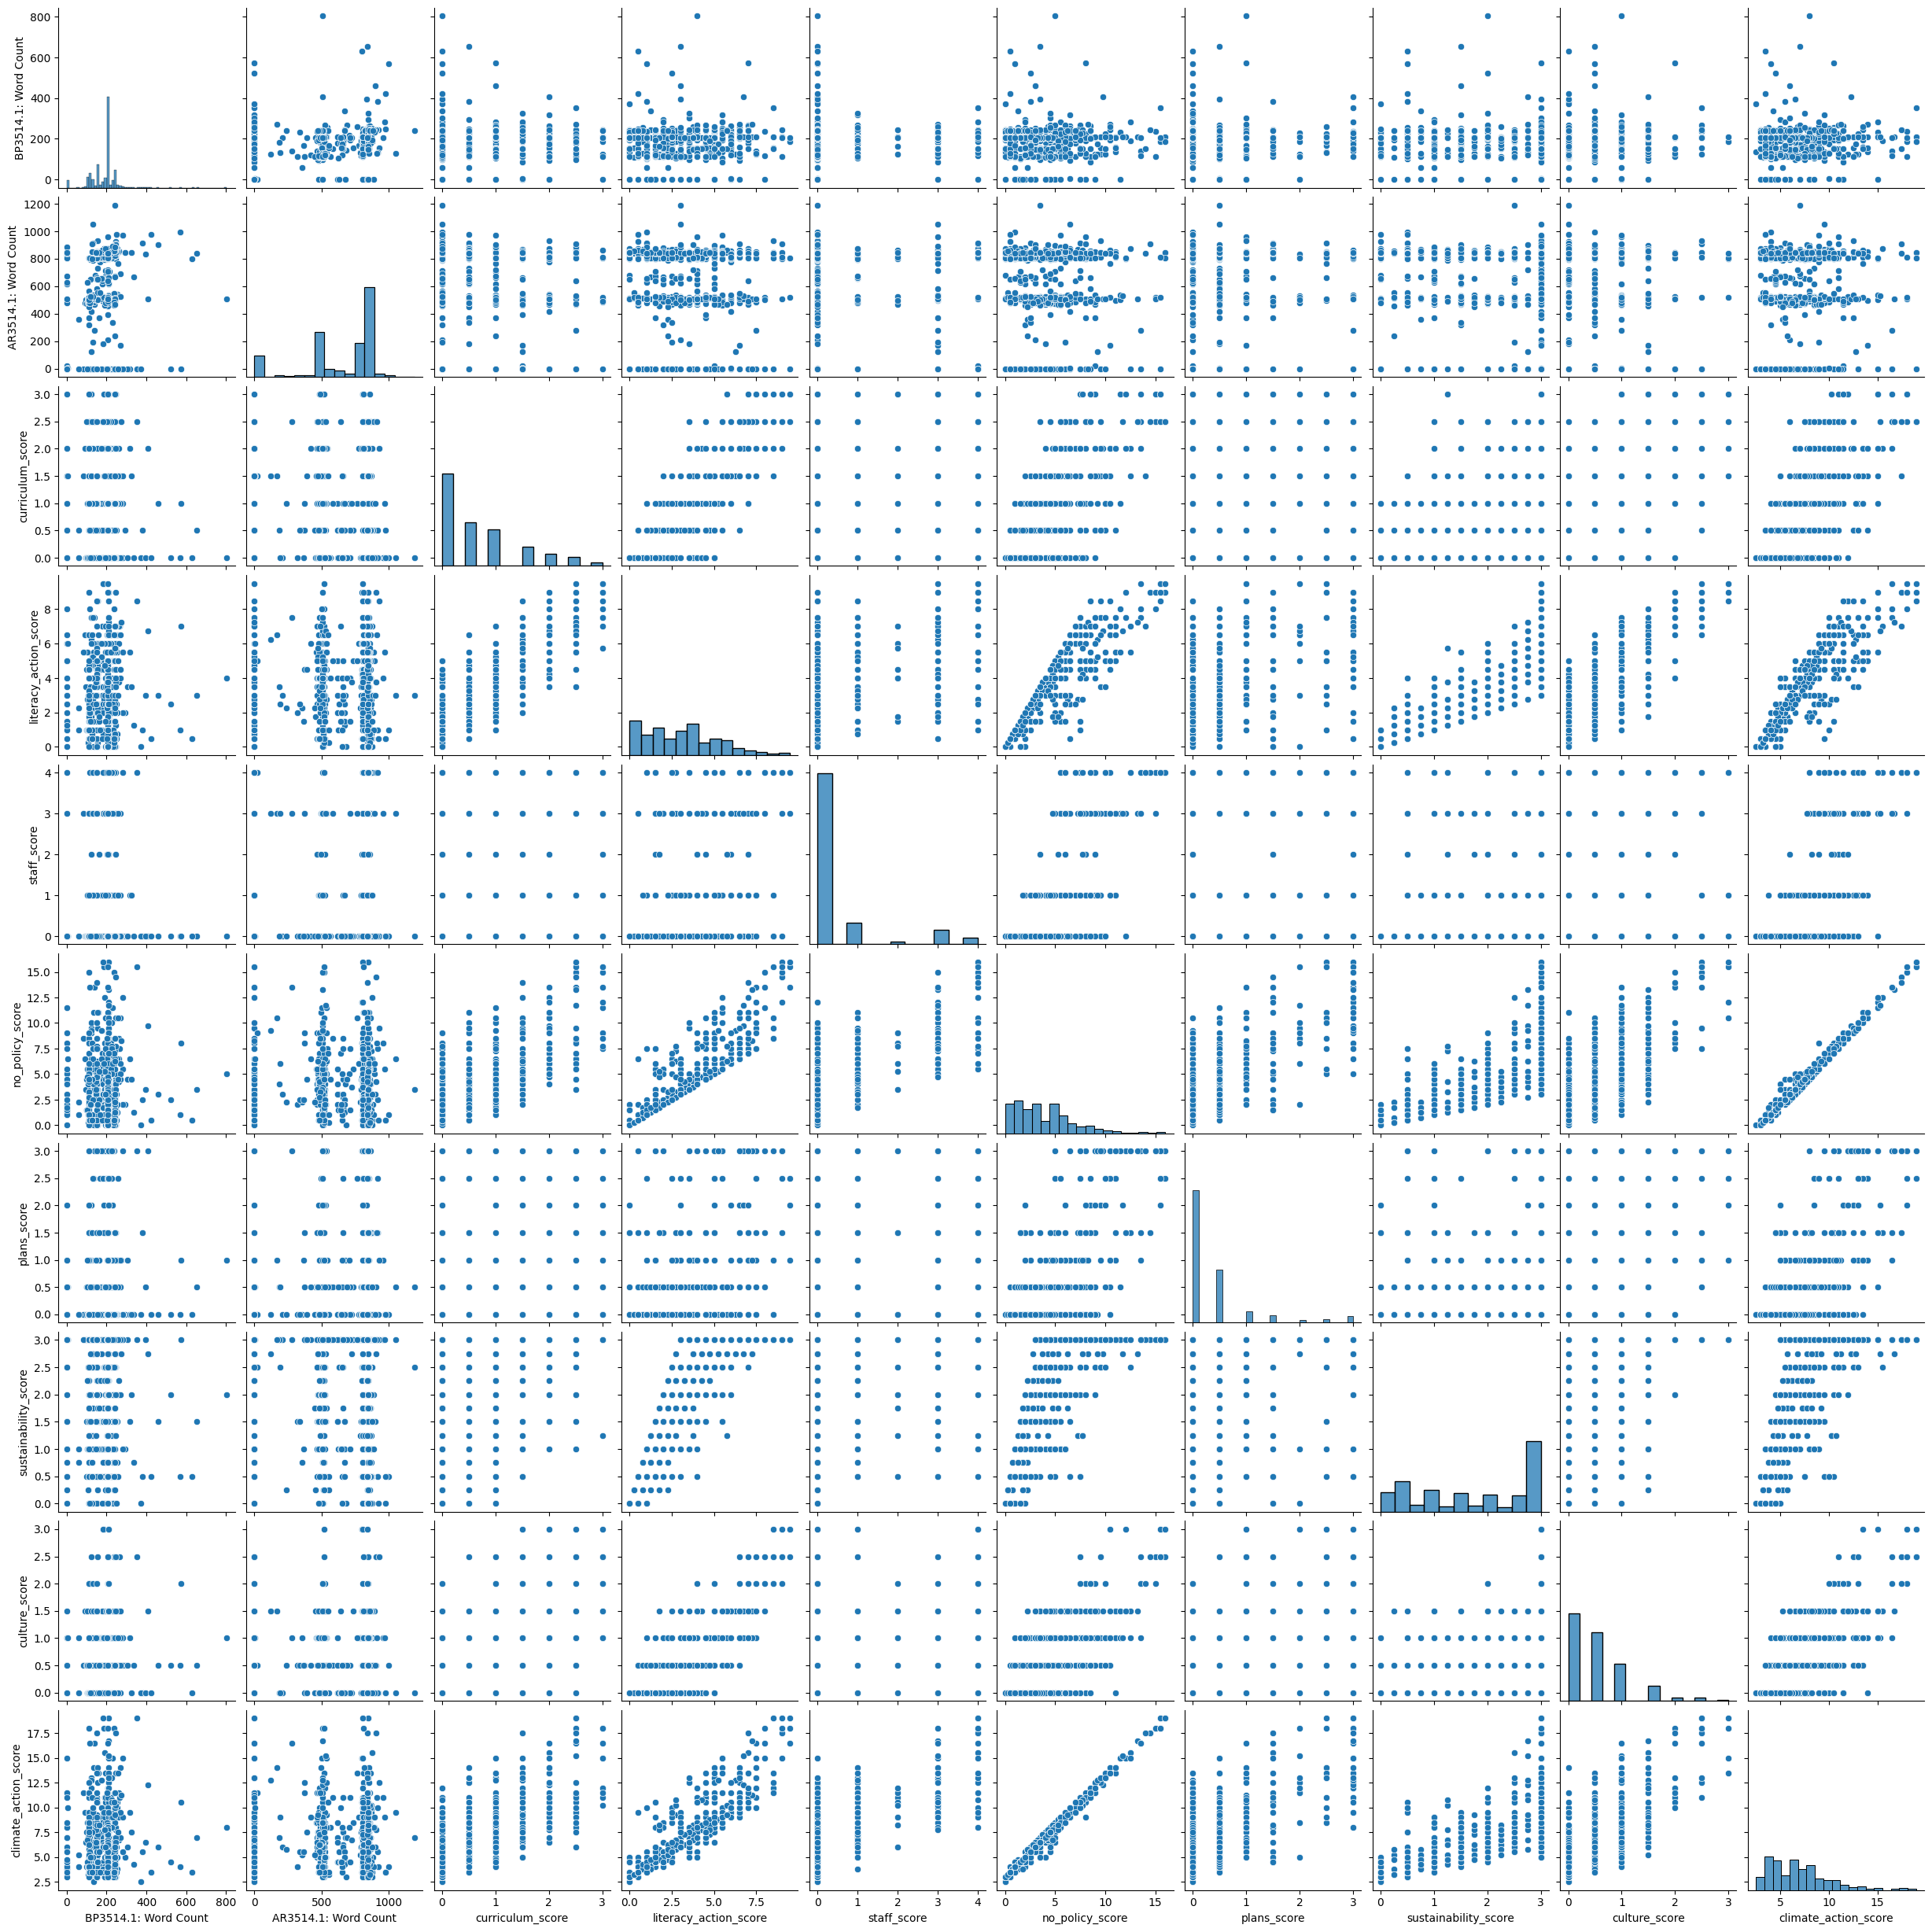

In [9]:
# Looking at the distributions of BP word count and the scores 
sns.pairplot(data=wc_and_scores_df)

### Findings (BP word count and scores) ###

Based on visual inspection of the data, I noticed that following scores have similar distributions when plotted against the word count variables:
- group 1: `literacy_action_score`, `climate_action_score` and `no_policy_score` 
- group 2: `curriculum_score`, `staff_score`, `plan_score`, and `culture_score`
- group 3: `sustainability_score` has a more unique distribution when plotted against BP3514.1 Word Count.

Despite these similarities in distributions, there does not appear to be any strong relationships between the word count variables and the scores. I will choose one score from each group to include in regression analysis to further investigate this. 

Aside from word count, there appears to be some stronger relationships between scores. I will further investiagte the following relationships based on visual inspection:
- `no_policy_score` and `climate_action_score`
- `literacy_action_score` and `climate_action_score`
- `literacy_action_score` and `curriculum_score` 

#### Overall District Action and Literacy Initiative Indicators ~ BP3514.1 Word Count

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
                              OLS Regression Results                             
Dep. Variable:     literacy_action_score   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.1909
Date:                   Mon, 06 Jan 2025   Prob (F-statistic):              0.662
Time:                           19:45:44   Log-Likelihood:                -1551.5
No. Observations:                    714   AIC:                             3107.
Df Residuals:                        712   BIC:                             3116.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    s

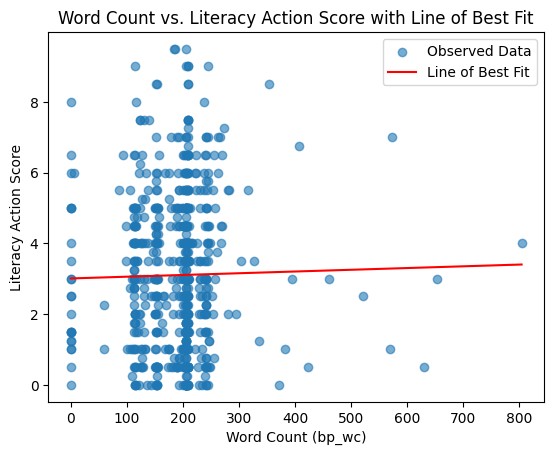

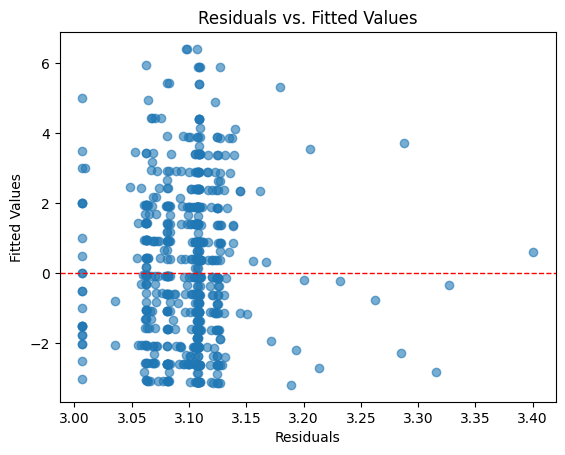

In [32]:
# fit OLS model
model_ols_wc1 = smf.ols('literacy_action_score ~ bp_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc1.summary())

# Plot original data
plt.scatter(wc_and_scores_df['bp_wc'], wc_and_scores_df['literacy_action_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['bp_wc'].min(), wc_and_scores_df['bp_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc1.params['Intercept'] + model_ols_wc1.params['bp_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (bp_wc)")
plt.ylabel("Literacy Action Score")
plt.title("Word Count vs. Literacy Action Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc1.fittedvalues, model_ols_wc1.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#### District-Wide Campus Sustainability Indicators ~ BP3514.1 Word Count 

                             OLS Regression Results                             
Dep. Variable:     sustainability_score   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.1437
Date:                  Mon, 06 Jan 2025   Prob (F-statistic):              0.705
Time:                          19:44:12   Log-Likelihood:                -1056.9
No. Observations:                   714   AIC:                             2118.
Df Residuals:                       712   BIC:                             2127.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8079      0.113

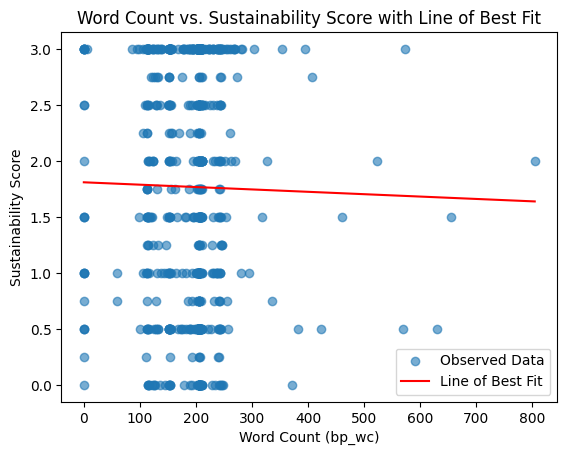

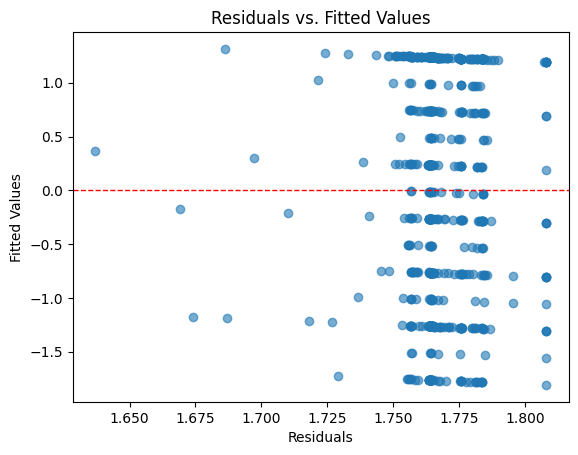

In [31]:
# fit OLS model
model_ols_wc2 = smf.ols('sustainability_score ~ bp_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc2.summary())

# Plot original data
plt.scatter(wc_and_scores_df['bp_wc'], wc_and_scores_df['sustainability_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['bp_wc'].min(), wc_and_scores_df['bp_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc2.params['Intercept'] + model_ols_wc2.params['bp_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (bp_wc)")
plt.ylabel("Sustainability Score")
plt.title("Word Count vs. Sustainability Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc2.fittedvalues, model_ols_wc2.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#### District-Wide Curriculum Environmental or Climate Literacy Indicators ~ BP3514.1 Word Count

                            OLS Regression Results                            
Dep. Variable:       curriculum_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2257
Date:                Mon, 06 Jan 2025   Prob (F-statistic):              0.635
Time:                        19:16:01   Log-Likelihood:                -829.47
No. Observations:                 714   AIC:                             1663.
Df Residuals:                     712   BIC:                             1672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7018      0.082      8.541      0.0

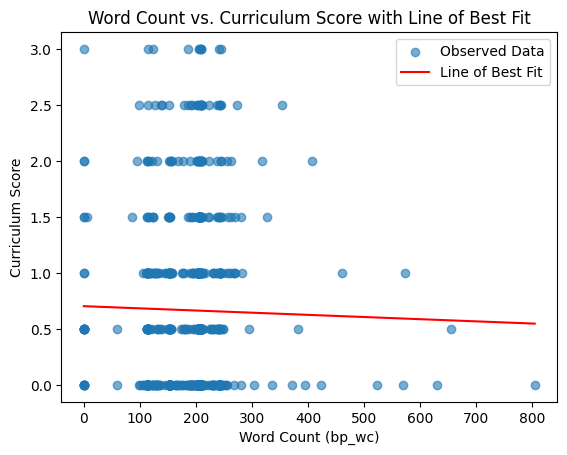

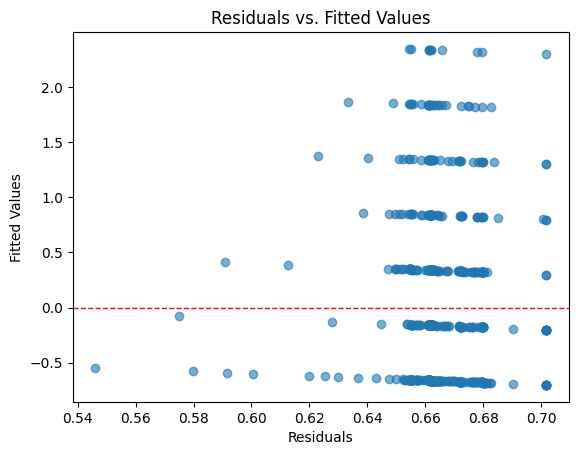

In [29]:
# fit OLS model
model_ols_wc3 = smf.ols('curriculum_score ~ bp_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc3.summary())

# Plot original data
plt.scatter(wc_and_scores_df['bp_wc'], wc_and_scores_df['curriculum_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['bp_wc'].min(), wc_and_scores_df['bp_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc3.params['Intercept'] + model_ols_wc3.params['bp_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (bp_wc)")
plt.ylabel("Curriculum Score")
plt.title("Word Count vs. Curriculum Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc3.fittedvalues, model_ols_wc3.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

### BP3514.1 Regression Findings

Based on these regression models, I conclude that there is no statistically signifcant relationship between the Board Policy 3514.1 word count and the the following scores:
- Overall District Action and Literacy Initiative Indicators (`literacy_score`)
- District-Wide Campus Sustainability Indicators (`sustainability_score`)
- District-Wide Curriculum Environmental or Climate Literacy Indicators (`curriculum_score`).

Since the distributions for `climate_action_score` and `no_policy_score` are similar to `literacy_score`, it is likely these scores also have no relationship with the Board Policy 3514.1 word count.

Similarly, since the distributions for `staff_score`, `plan_score`, and `culture_score` are similar to `curriculum_score` it is likely these scores also have no relationship with the Board Policy 3514.1 word count.

#### Overall District Action and Literacy Initiative Indicators ~ AR3514.1 Word Count

                              OLS Regression Results                             
Dep. Variable:     literacy_action_score   R-squared:                       0.009
Model:                               OLS   Adj. R-squared:                  0.008
Method:                    Least Squares   F-statistic:                     6.512
Date:                   Mon, 06 Jan 2025   Prob (F-statistic):             0.0109
Time:                           20:03:29   Log-Likelihood:                -1548.3
No. Observations:                    714   AIC:                             3101.
Df Residuals:                        712   BIC:                             3110.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5957 

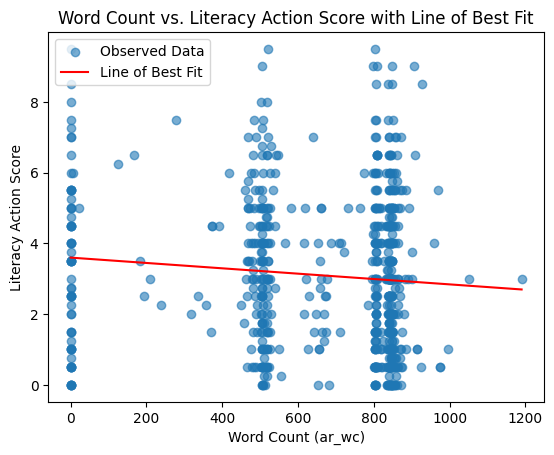

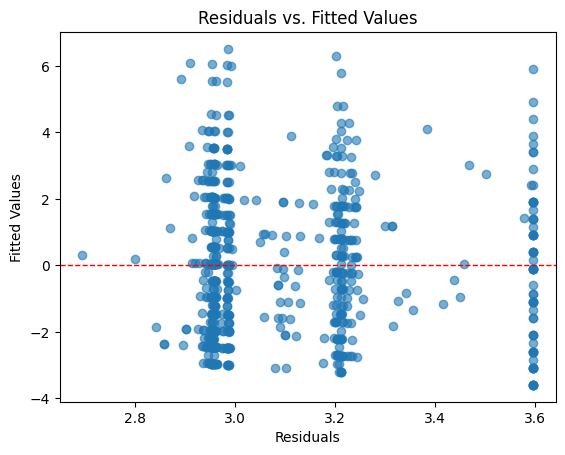

In [33]:
# fit OLS model
model_ols_wc4 = smf.ols('literacy_action_score ~ ar_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc4.summary())

# Plot original data
plt.scatter(wc_and_scores_df['ar_wc'], wc_and_scores_df['literacy_action_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['ar_wc'].min(), wc_and_scores_df['ar_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc4.params['Intercept'] + model_ols_wc4.params['ar_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (ar_wc)")
plt.ylabel("Literacy Action Score")
plt.title("Word Count vs. Literacy Action Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc4.fittedvalues, model_ols_wc4.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#### District-Wide Campus Sustainability Indicators ~ AR3514.1 Word Count 

                             OLS Regression Results                             
Dep. Variable:     sustainability_score   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     2.892
Date:                  Mon, 06 Jan 2025   Prob (F-statistic):             0.0895
Time:                          20:08:58   Log-Likelihood:                -1055.5
No. Observations:                   714   AIC:                             2115.
Df Residuals:                       712   BIC:                             2124.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9338      0.105

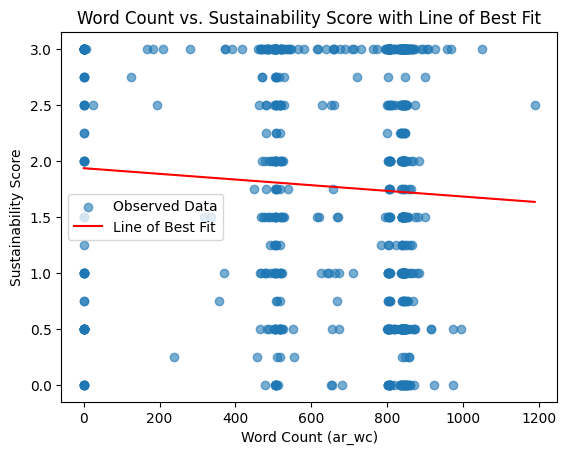

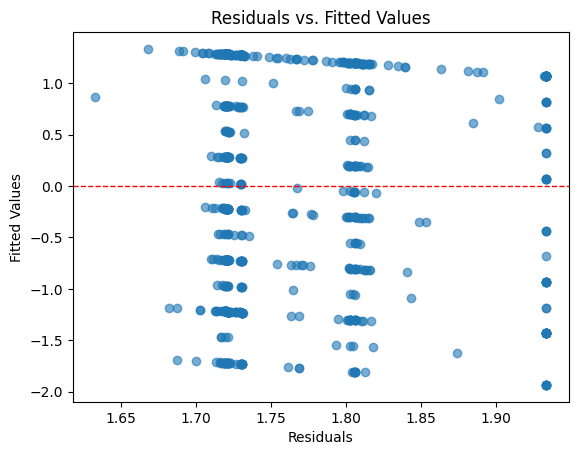

In [34]:
# fit OLS model
model_ols_wc5 = smf.ols('sustainability_score ~ ar_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc5.summary())

# Plot original data
plt.scatter(wc_and_scores_df['ar_wc'], wc_and_scores_df['sustainability_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['ar_wc'].min(), wc_and_scores_df['ar_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc5.params['Intercept'] + model_ols_wc5.params['ar_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (ar_wc)")
plt.ylabel("Sustainability Score")
plt.title("Word Count vs. Sustainability Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc5.fittedvalues, model_ols_wc5.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#### District-Wide Curriculum Environmental or Climate Literacy Indicators ~ AR3514.1 Word Count

                            OLS Regression Results                            
Dep. Variable:       curriculum_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.518
Date:                Mon, 06 Jan 2025   Prob (F-statistic):             0.0109
Time:                        20:12:01   Log-Likelihood:                -826.33
No. Observations:                 714   AIC:                             1657.
Df Residuals:                     712   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8460      0.076     11.067      0.0

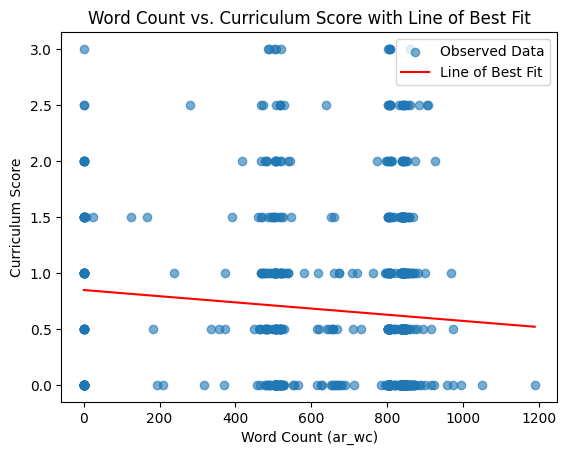

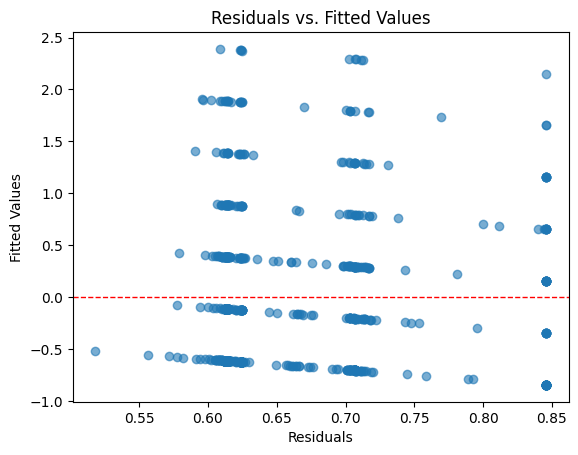

In [35]:
# fit OLS model
model_ols_wc6 = smf.ols('curriculum_score ~ ar_wc', data=wc_and_scores_df).fit()

# Print results
print(model_ols_wc6.summary())

# Plot original data
plt.scatter(wc_and_scores_df['ar_wc'], wc_and_scores_df['curriculum_score'], alpha=0.6, label='Observed Data')
# Generate values for the line of best fit
x = np.linspace(wc_and_scores_df['ar_wc'].min(), wc_and_scores_df['ar_wc'].max(), 100)  # Range of the predictor
y = model_ols_wc6.params['Intercept'] + model_ols_wc6.params['ar_wc'] * x  # Best-fit line equation
# Plot the line of best fit
plt.plot(x, y, color='red', label='Line of Best Fit')

# Add labels, title, and legend
plt.xlabel("Word Count (ar_wc)")
plt.ylabel("Curriculum Score")
plt.title("Word Count vs. Curriculum Score with Line of Best Fit")
plt.legend()
plt.show()

# Plot residuals 
plt.scatter(model_ols_wc6.fittedvalues, model_ols_wc6.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at residual=0
plt.ylabel("Fitted Values")
plt.xlabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

### AR3514.1 Regression Findings

Based on these regression models, I cannot conclude that there is any statistically signifcant relationship between the Administrative Regulation 3514.1 word count and the the following scores:
- Overall District Action and Literacy Initiative Indicators (`literacy_score`)
- District-Wide Campus Sustainability Indicators (`sustainability_score`)
- District-Wide Curriculum Environmental or Climate Literacy Indicators (`curriculum_score`).

For `literacy_score`, the p-value is 0.011, which is statistically significant at the 5% level. However, the coefficient on the word count is very close to zero (-0.0008) and there are multicolliniarity issues that make this result unreliable. The same factors are present in the models for `sustainability_score` and `curriculum_score`; they all have multicollinearity and coefficients very close to zero. Hence, there seems to be no relationship between AR word count and the scores.

Since the distributions for `climate_action_score` and `no_policy_score` are similar to `literacy_score`, it is likely these scores also have no relationship with the Administrative Regulation 3514.1 word count.

Similarly, since the distributions for `staff_score`, `plan_score`, and `culture_score` are similar to `curriculum_score` it is likely these scores also have no relationship with the Administrative Regulation 3514.1 word count.

**Further analysis: look at the relationships between the scores.** 

# 3. Word/Phrase Frequency Analysis

# 4. Template Comparison

# 5. Conclusion 